In [1]:
import graphlab
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [2]:
random.seed(98103)
n=30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

This non-commercial license of GraphLab Create for academic use is assigned to sripriya.kuram@gmail.com and will expire on September 13, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\sripr\AppData\Local\Temp\graphlab_server_1478575100.log.0


In [7]:
y = x.apply(lambda x : math.sin(4*x))
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.2559724913175498, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [8]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e
y

dtype: float
Rows: 30
[0.5870501910256387, 0.6486558513722105, 0.30780330948476986, 0.31074844741664676, 0.23740962549610656, 0.7050171572238372, 0.4617166769923188, 0.38326050785082555, 1.065176914291498, 1.031847069489963, 1.1340397144416507, 0.6460829679251624, 0.9430717327225886, 0.9028159665477785, 0.31406589001960095, 0.9390451220174663, 0.7586334475537929, 1.4099949798044635, 0.6496841484249276, 0.4842680676563489, 0.9374902532939589, 0.4046801938310186, 0.2836240244210624, -0.2216277264003625, -0.1020645281188296, 0.08545706817812287, -0.1609077841383484, -0.367647959398532, -0.8189624294692727, -0.37968361804843936]

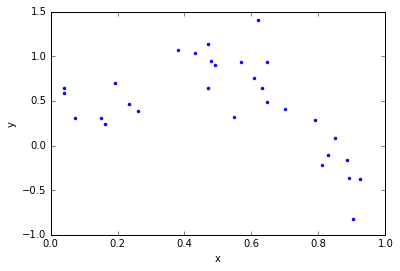

In [12]:
data = graphlab.SFrame({'X1': x , 'Y': y})
def plot_data(data):
    %matplotlib inline
    plt.plot(data['X1'] , data['Y'] , '.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
plot_data(data)

In [14]:
def polynomial_features(data,deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)] = data_copy['X'+str(i)] * data_copy['X1']
    return data_copy

In [16]:
def polynomial_regression(data , deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg) , target ='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model

In [26]:
def plot_poly_predictions(data,model):
    plot_data(data)
    deg = len(model.coefficients['value'])-1
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    plt.plot(x_pred['X1'], y_pred , 'g-', label='degree '+str(deg)+'fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [22]:
def print_coefficients(model):
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print np.poly1d(w)

In [23]:
model = polynomial_regression(data ,2)

In [24]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


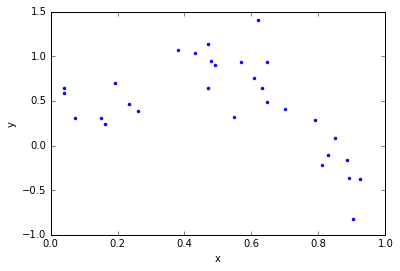

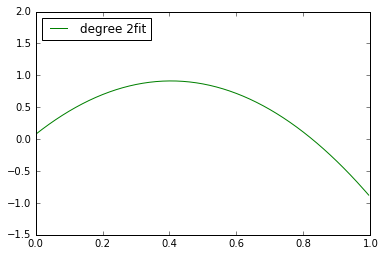

In [27]:
plot_poly_predictions(data,model)

In [28]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

In [29]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


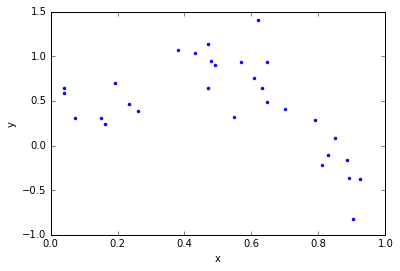

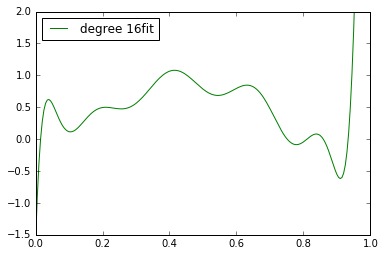

In [30]:
plot_poly_predictions(data,model)